<a href="https://colab.research.google.com/github/Neu-Utkarsh/Hands-on-ML-O-Reily-/blob/main/Chapter3/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False)

In [2]:
mnist1 = fetch_openml('mnist_784',as_frame=True)

In [3]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [4]:
X1,Y1 = mnist1['data'],mnist1['target']
X1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


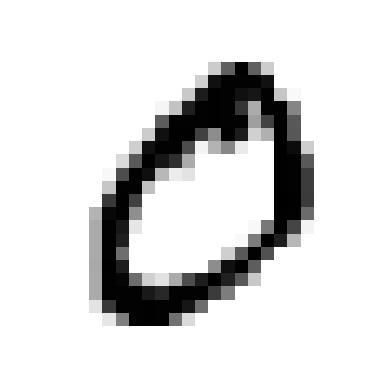

In [6]:
def plot_digit(image_data) :
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap='binary')
  plt.axis ('off')

some_digit = X[1]
plot_digit(some_digit)
plt.show()


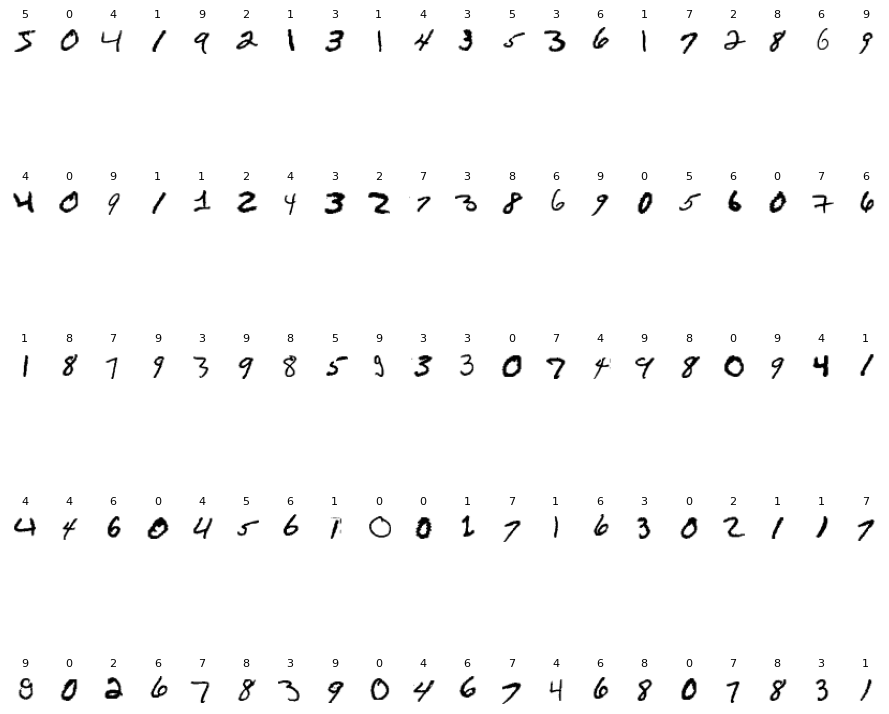

In [7]:
plt.figure(figsize = (9,9))
for i in range(100) :
  plt.subplot(5,20,i+1)
  plt.imshow(X[i].reshape(28,28),cmap='binary')
  plt.title(str(y[i]), fontsize=8)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Training a binary Classifier

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([X_train[0]])

array([ True])

### Performance Measures

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.97192907, 0.96855413, 0.96024858])

In [13]:
# as we don't want to touch the test cases now we predict on samples of X which
# is not seen during traning to get an estimate of predictions

from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_train_predict)
cm

array([[50287,   673],
       [ 1180,  3860]])

In [15]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_5,y_train_predict)

0.8515332009706597

In [16]:
recall_score(y_train_5,y_train_predict)

0.7658730158730159

In [17]:
f1_score(y_train_5,y_train_predict)

0.8064347644416588

In [18]:
# There is in every project we have precision-recall tradeoff
# So we chceck for thresholds which can be suitable according to the project

y_scores = sgd_clf.decision_function([X_train[0]])
y_scores

array([1944.72121115])

In [19]:
# Default threshold for sgdclassifier is zero

threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
# Now changing the threshold
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, method='decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

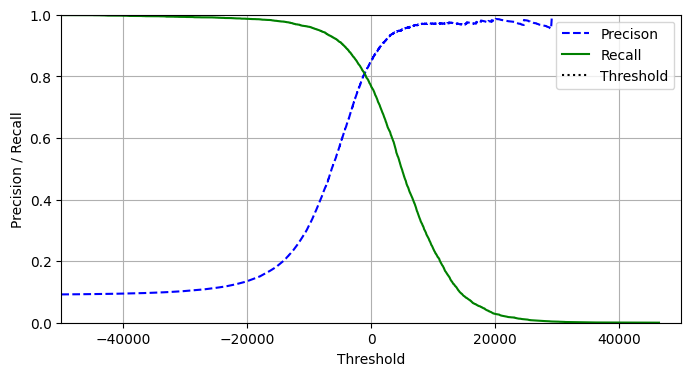

In [23]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],'b--',label='Precison')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.vlines(threshold,0,1.0,'k','dotted',label='Threshold')

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])


plt.grid()
plt.legend()
plt.xlabel('Threshold')
plt.ylabel("Precision / Recall")
plt.show()

In [24]:
# like we want to see T WHAT threshold we can get90% precision
id_90 = (precisions >= 0.90).argmax()
threshold_90 = thresholds[id_90]

In [25]:
y_pred_90 = (y_scores >= thresholds[id_90])

In [26]:
precision_score(y_train_5,y_pred_90)

0.9

In [27]:
recall_score(y_train_5,y_pred_90)

0.6946428571428571

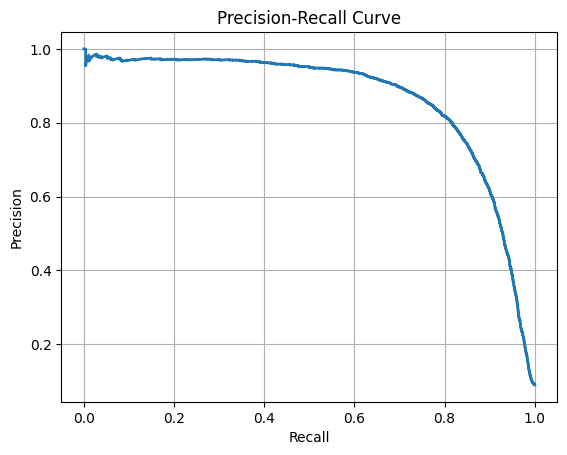

In [28]:

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


## ROC Curve

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [30]:
roc_auc_score(y_train_5,y_scores)

np.float64(0.9672937302210262)

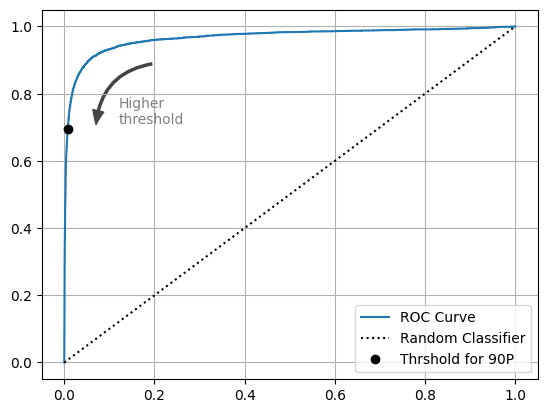

In [31]:
from matplotlib import patches


id_90 = (thresholds <= threshold_90).argmax()
tpr_90, fpr_90 = tpr[id_90], fpr[id_90]

plt.plot(fpr,tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k:', label='Random Classifier')
plt.plot([fpr_90],[tpr_90],'ko', label='Thrshold for 90P')

plt.gca().add_patch(patches.FancyArrowPatch((0.2,0.89),(0.07,0.70),
                                            connectionstyle='arc3,rad=.4',
                                            arrowstyle='Simple, tail_width=1.5, head_width=8,head_length=10',color='#444444'))

plt.text(0.12, 0.71, "Higher\nthreshold", color="gray")

plt.grid()
plt.legend()
plt.show()

In [32]:
# Making RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [ ]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
y_probas_forest

In [ ]:
y_probas_forest[:2]

In [ ]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

In [ ]:
p_forest, r_forest, thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)


In [ ]:
plt.plot(r_forest,p_forest,'b-',label='Random Forest')
plt.plot(recalls, precisions,'k--', label='SGD')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)

## Multiclass Classification